# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude

from citipy import citipy

output_data_file = "../output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [15]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        #print(city_weather)
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping....")
        pass
        # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")     

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port mathurin
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | murgab
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | luganville
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | tura
Processing Record 8 of Set 1 | margaret river
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | cairns city
City not found. Skipping....
Processing Record 12 of Set 1 | whitehorse
Processing Record 13 of Set 1 | dhidhdhoo
Processing Record 14 of Set 1 | sao vicente
Processing Record 15 of Set 1 | constitucion
Processing Record 16 of Set 1 | invercargill
Processing Record 17 of Set 1 | tolanaro
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | ketchikan
Processing Record 20 of Set 1 | zhalantun
Processing Record 21 of Set 1 | mogad

Processing Record 41 of Set 4 | shiprock
Processing Record 42 of Set 4 | sola
Processing Record 43 of Set 4 | bonthe
Processing Record 44 of Set 4 | shingu
Processing Record 45 of Set 4 | walvis bay
Processing Record 46 of Set 4 | mount gambier
Processing Record 47 of Set 4 | jordan
Processing Record 48 of Set 4 | caleta de carquin
Processing Record 49 of Set 4 | acarau
Processing Record 0 of Set 5 | anadyr
Processing Record 1 of Set 5 | chisec
Processing Record 2 of Set 5 | akureyri
Processing Record 3 of Set 5 | koubia
Processing Record 4 of Set 5 | duncan
Processing Record 5 of Set 5 | katsuura
Processing Record 6 of Set 5 | elko
Processing Record 7 of Set 5 | lihue
Processing Record 8 of Set 5 | suoyarvi
Processing Record 9 of Set 5 | bihac
Processing Record 10 of Set 5 | chulakkurgan
Processing Record 11 of Set 5 | harstad
Processing Record 12 of Set 5 | novodvinsk
Processing Record 13 of Set 5 | mount isa
Processing Record 14 of Set 5 | dapa
Processing Record 15 of Set 5 | artech

Processing Record 32 of Set 8 | manggar
Processing Record 33 of Set 8 | kota bharu
Processing Record 34 of Set 8 | zilair
Processing Record 35 of Set 8 | dumai
Processing Record 36 of Set 8 | guerrero negro
Processing Record 37 of Set 8 | longboat key
Processing Record 38 of Set 8 | strelka
Processing Record 39 of Set 8 | lanzhou
Processing Record 40 of Set 8 | ulaangom
Processing Record 41 of Set 8 | sur
Processing Record 42 of Set 8 | tubarjal
Processing Record 43 of Set 8 | dobresti
Processing Record 44 of Set 8 | kupang
Processing Record 45 of Set 8 | san antonio del estrecho
City not found. Skipping....
Processing Record 46 of Set 8 | saudarkrokur
Processing Record 47 of Set 8 | conde
Processing Record 48 of Set 8 | mugia
Processing Record 49 of Set 8 | dryden
Processing Record 0 of Set 9 | an nuhud
Processing Record 1 of Set 9 | parham
Processing Record 2 of Set 9 | san carlos
Processing Record 3 of Set 9 | sao joao da barra
Processing Record 4 of Set 9 | kotdwara
Processing Reco

Processing Record 22 of Set 12 | bodaybo
Processing Record 23 of Set 12 | poisy
Processing Record 24 of Set 12 | padang
Processing Record 25 of Set 12 | daoukro
Processing Record 26 of Set 12 | namsos
Processing Record 27 of Set 12 | sandnessjoen
Processing Record 28 of Set 12 | mmabatho
Processing Record 29 of Set 12 | mthatha
Processing Record 30 of Set 12 | tongliao
Processing Record 31 of Set 12 | nishinoomote
Processing Record 32 of Set 12 | necochea
Processing Record 33 of Set 12 | dhuusamarreeb
Processing Record 34 of Set 12 | homer
Processing Record 35 of Set 12 | broome
Processing Record 36 of Set 12 | acajutla
Processing Record 37 of Set 12 | shchigry
Processing Record 38 of Set 12 | san fernando
Processing Record 39 of Set 12 | cho dok
Processing Record 40 of Set 12 | viborg
Processing Record 41 of Set 12 | brokopondo
Processing Record 42 of Set 12 | scarborough
Processing Record 43 of Set 12 | as sulayyil
Processing Record 44 of Set 12 | balakliya
Processing Record 45 of Se

In [10]:
# Convert the cities weather data into a Pandas DataFrame


city_data_df = pd.DataFrame(city_data)
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
city_data_df.to_csv("output_data_file", index_label="City_ID")

#Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port mathurin,-19.6833,63.4167,72.81,77,66,18.03,MU,1695849255
1,adamstown,-25.0660,-130.1015,69.73,64,96,7.38,PN,1695849255
2,murgab,37.4966,61.9714,65.61,27,39,8.12,TM,1695849256
3,port-aux-francais,-49.3500,70.2167,35.22,69,70,30.58,TF,1695849256
4,luganville,-15.5333,167.1667,76.03,75,97,12.33,VU,1695849256


In [21]:
# Export the City_Data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv(output_data_file, index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,72.81,77,66,18.03,MU,1695849255
1,adamstown,-25.0660,-130.1015,69.73,64,96,7.38,PN,1695849255
2,murgab,37.4966,61.9714,65.61,27,39,8.12,TM,1695849256
3,port-aux-francais,-49.3500,70.2167,35.22,69,70,30.58,TF,1695849256
4,luganville,-15.5333,167.1667,76.03,75,97,12.33,VU,1695849256


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

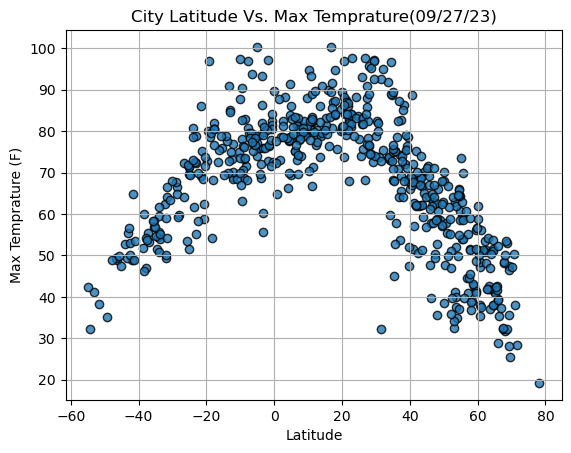

In [30]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolor="black", marker='o', alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temprature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temprature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

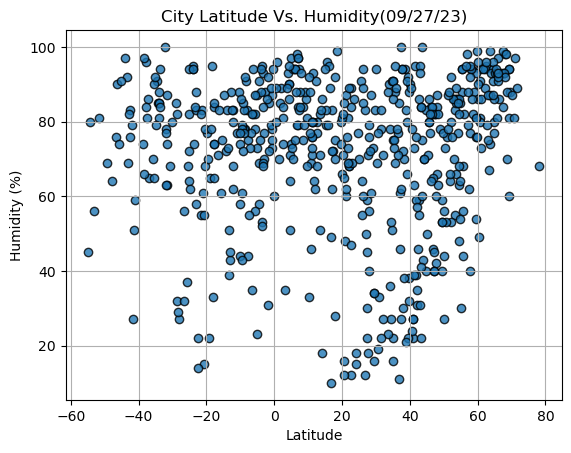

In [33]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolor="black", marker='o', alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

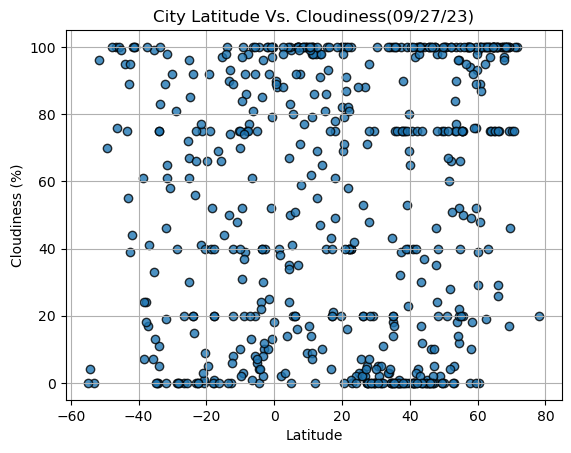

In [34]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolor="black", marker='o', alpha=0.8)


# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

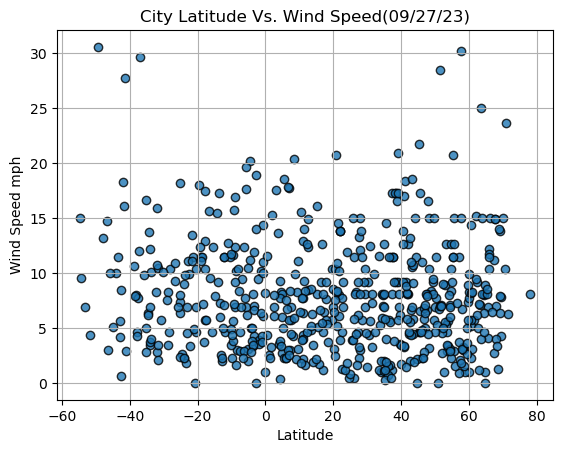

In [35]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolor="black", marker='o', alpha=0.8)
# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [40]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,murgab,37.4966,61.9714,65.61,27,39,8.12,TM,1695849256
6,tura,25.5198,90.2201,74.12,91,7,3.89,IN,1695849257
10,whitehorse,60.7161,-135.0538,47.17,94,100,2.30,CA,1695849349
11,dhidhdhoo,6.8833,73.1000,82.00,79,100,17.78,MV,1695849430
16,yellowknife,62.4560,-114.3525,51.42,95,100,9.22,CA,1695849382


In [41]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,72.81,77,66,18.03,MU,1695849255
1,adamstown,-25.0660,-130.1015,69.73,64,96,7.38,PN,1695849255
3,port-aux-francais,-49.3500,70.2167,35.22,69,70,30.58,TF,1695849256
4,luganville,-15.5333,167.1667,76.03,75,97,12.33,VU,1695849256
5,hermanus,-34.4187,19.2345,54.54,85,0,13.73,ZA,1695849256


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.7975226995393757


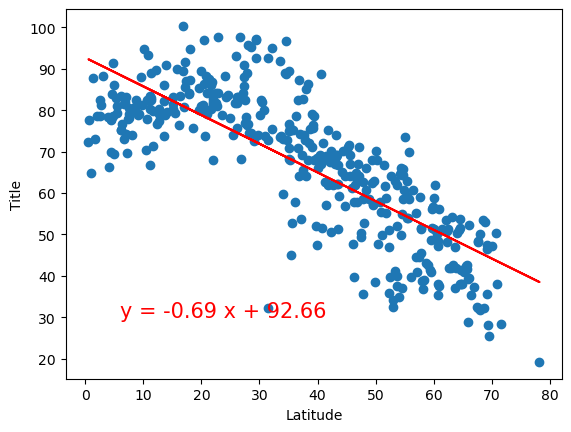

In [42]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

The r-squared is: 0.8038603452482792


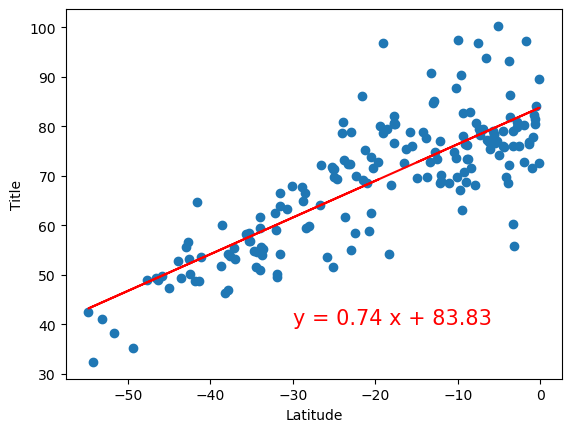

In [43]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.1015677064142033


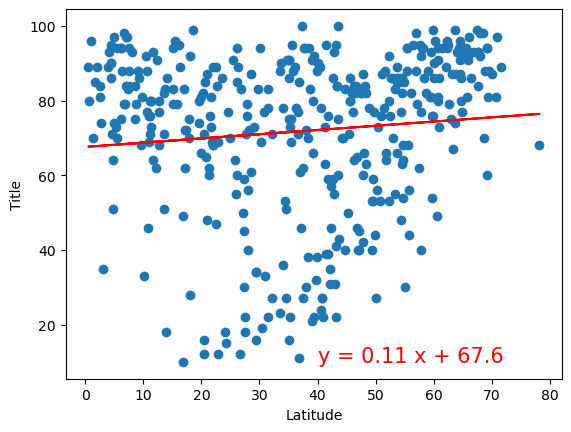

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: -0.008393114098664386


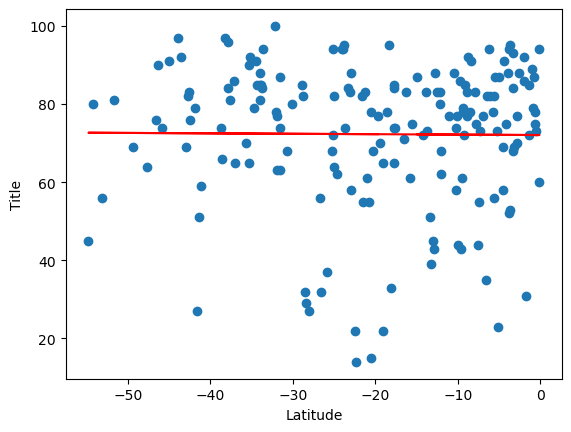

In [45]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.10431321917881582


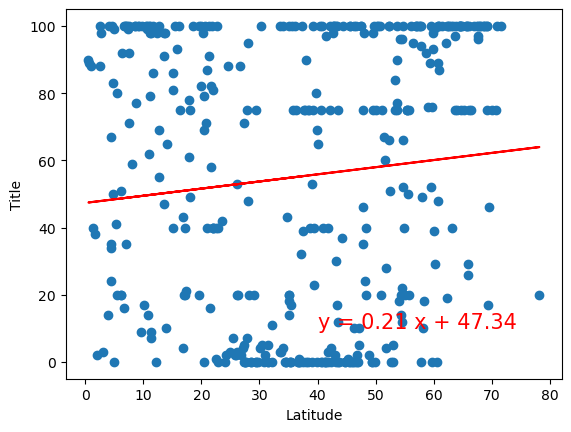

In [46]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: -0.03449183905756544


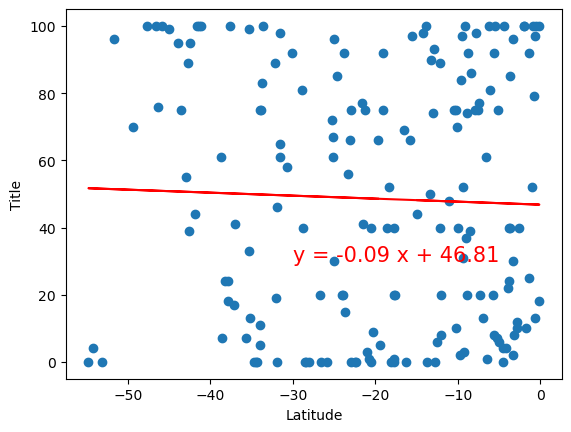

In [47]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.061383125313974496


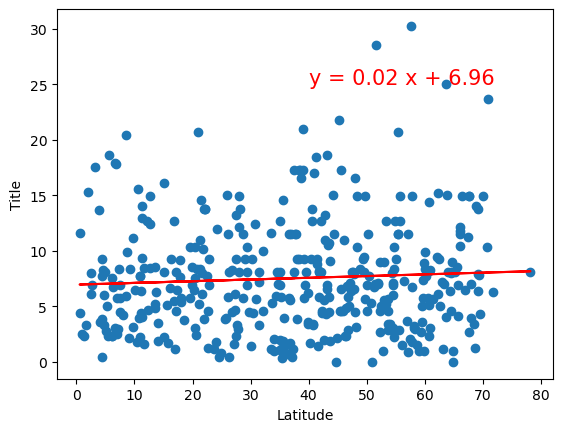

In [48]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (40,25))

The r-squared is: -0.14344009447856038


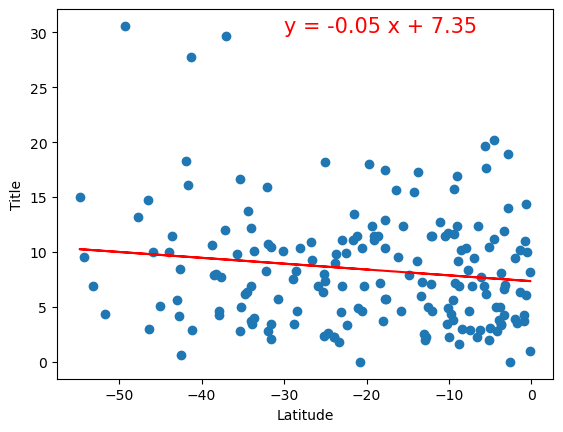

In [50]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE